In [1]:
# Importing packages including vgg19 using imagenet weights

from keras.applications import VGG19
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard 
import time 
 
vgg_conv = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Using TensorFlow backend.


In [4]:
# Fetching data from directory and performing data augmentation

import keras
import numpy as np
from random import shuffle
train_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/project_data/train'
validation_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/project_data/validation'
 
nTrain = 174
nValidation = 74

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 10
 
train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,4))

validation_features = np.zeros(shape=(nValidation, 7, 7, 512))
validation_labels = np.zeros(shape=(nValidation,4))


 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

Found 174 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [5]:
import keras
nImages=174
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nImages:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

In [6]:
import keras
nValid=74
i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nValid:
        break
         
validation_features = np.reshape(validation_features, (nValidation, 7 * 7 * 512))

In [7]:
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 174 samples, validate on 74 samples
Epoch 1/50
174/174 [==============================] - 5s 28ms/step - loss: 2.5918 - acc: 0.5460 - val_loss: 1.1805 - val_acc: 0.5405
Epoch 2/50
174/174 [==============================] - 3s 19ms/step - loss: 1.4369 - acc: 0.4655 - val_loss: 1.0618 - val_acc: 0.5135
Epoch 3/50
174/174 [==============================] - 3s 19ms/step - loss: 1.1235 - acc: 0.4885 - val_loss: 1.0622 - val_acc: 0.4730
Epoch 4/50
174/174 [==============================] - 3s 19ms/step - loss: 1.1311 - acc: 0.6207 - val_loss: 0.9863 - val_acc: 0.5946
Epoch 5/50
174/174 [==============================] - 3s 19ms/step - loss: 1.0802 - acc: 0.6149 - val_loss: 1.0617 - val_acc: 0.4324
Epoch 6/50
174/174 [==============================] - 3s 19ms/step - loss: 1.0764 - acc: 0.6034 - val_loss: 1.0234 - val_acc: 0.5135
Epoch 7/50
174/174 [==============================] - 3s 19ms/step - loss: 1.0385 - acc: 0.6437 - val_loss: 0.9392 - val_acc: 0.5135
Epoch 8/50
174/174 [====

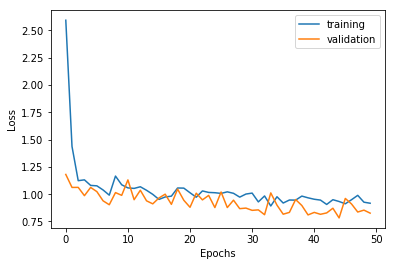

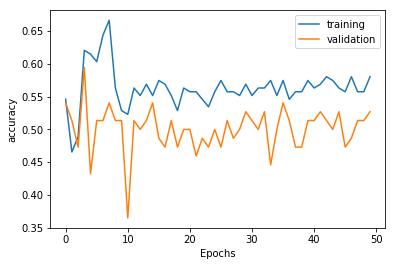

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model.predict(validation_features)
y_pred = model.predict_classes(validation_features)
target_names = ['class 0(Normal)', 'class 1(DR1)', 'class 2(DR2)', 'class 3(DR3)']
print(classification_report(np.argmax(validation_labels, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(validation_labels, axis=1), y_pred))

                 precision    recall  f1-score   support

class 0(Normal)       0.00      0.00      0.00         9
   class 1(DR1)       0.40      0.95      0.56        22
   class 2(DR2)       0.00      0.00      0.00        22
   class 3(DR3)       0.86      0.86      0.86        21

      micro avg       0.53      0.53      0.53        74
      macro avg       0.31      0.45      0.35        74
   weighted avg       0.36      0.53      0.41        74

[[ 0  7  0  2]
 [ 0 21  0  1]
 [ 0 22  0  0]
 [ 0  3  0 18]]
